Importing the dependicies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
# Data Collection & Pre-Processing
df_loan = pd.read_csv('content/dataset.csv')

In [10]:
print(df_loan.shape)
df_loan.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
# missing values in each column
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_loan["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
# Drop all the missing valure from dataset

loan_dataset =df_loan.dropna()

In [16]:
# Label Encoding

loan_dataset.replace({"Loan_Dataser":{'N': 0, 
                                      'Y' : 1}}, inplace = True)

In [17]:
loan_datasetEducation

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
#Dependet column values

loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [20]:
# Replacing the value of 3 to 4

loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

# Dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [21]:
# Data Visualization


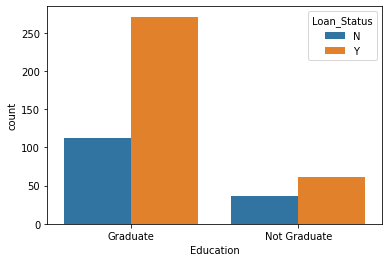

In [25]:
# Educate and loan Status
sns.countplot(x = 'Education', hue = 'Loan_Status', data=loan_dataset )

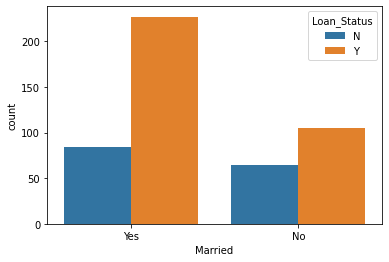

In [26]:
# married and loan Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data=loan_dataset )

In [30]:
# Convert the Catagorical columns to numerical values


loan_dataset.replace({'Married': {"No": 0, "Yes": 1}, "Gender": {'Male': 1, "Female": 0},'Self_Employee':{"No":0, "Yes": 1},
                        "Property_Area":{"Rural": 0,"Urban":2, "SemiUrban":1},"Education":{'Graduate': 1,'Not Graduate': 0}}, inplace = True)

In [31]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,Yes,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,No,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,4,1,No,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,No,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,1,No,7583,0.0,187.0,360.0,1.0,2,Y


In [33]:
# Seperating the data and labesl

x = loan_dataset.drop(columns=["Loan_ID",'Loan_Status'], axis = 1,inplace =True)

In [34]:
y = loan_dataset['Loan_Status']

KeyError: ignored